In [1]:
import jax.numpy as np
from jax import jit
from discopy import Tensor
Tensor.np = np

import discopy

In [2]:
#******************************************
# Generate your corpus
#******************************************
# sentences can be of the `word1 word2 word3 ...`
# if you are generating the diagrams using templates
# then you may want to consider adding POS tags (N, V, Adj) for each word
# labels should be of the form [0,1] or [1,0] for binary classification

# TODO make sentences
train_sentences = ['Alice loves Bob', 'Alice hates Eve', 'Bob kills Eve']
dev_sentences = ['Alice likes Bob', 'Alice dislikes Eve', 'Bob murders Eve']
test_sentences = ['Alice adores Bob', 'Alice detests Eve', 'Bob assassinates Eve']

# TODO make labels
train_labels = [1,0,1]
dev_labels = [1,0,1]
test_labels = [1,0,1]

train_labels = np.array(train_labels)
dev_labels = np.array(dev_labels)
test_labels = np.array(test_labels)

In [3]:
train_labels

DeviceArray([1, 0, 1], dtype=int32)

In [4]:
from discopy import Ty, Word, Cup, Id

s, n = Ty('s'), Ty('n')
tv = n.r @ s @ n.l

grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

def sentence2diagram(s):
    for subj, verb, obj in [s.split(' ')]:
        diagram = Word(subj, n) @ Word(verb, tv) @ Word(obj, n) >> grammar
        #diagram = {s: Word(subj, n) @ Word(verb, tv) @ Word(obj, n) >> grammar}
    return diagram
    #diagrams[sentence].draw()
    #print("Pregroup diagram for '{}'".format(sentence))
    #print(sentence)
    #print(subj)

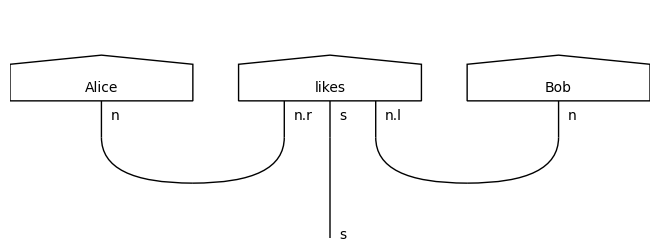

In [5]:
#******************************************
# Generate your diagrams
#******************************************
# TODO generate the DisCoCat diagrams for your corpus. There are 2 options:
# 1. Follow a few fixed templates (N V N, N V Adj N, ...)
# 2. Use the online tool to generate diagrams. 
# If you are using the online tool, consider writing a script.

# Suggestion: print out some of your DisCoCat diagrams using
# `grammar.draw` to check that they make sense.

# TODO implement sentence2diagram
#sentence2diagram = None

train_diagrams = [sentence2diagram(s) for s in train_sentences]
dev_diagrams = [sentence2diagram(s) for s in dev_sentences]
test_diagrams = [sentence2diagram(s) for s in test_sentences]

from discopy import Word, Ty, Cup, Id, grammar
from sympy.abc import phi

n, s = Ty('n'), Ty('s')

# example of how to make your template:
# then you use your pos tags to determine which template to use
def NVN_example(w0, w1, w2):
    words = Word(w0, n) @ Word(w1, n.r @ s @ n.l) @ Word(w2, n)
    cups = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

    return words >> cups

grammar.draw(NVN_example('Alice', 'likes', 'Bob'))

In [6]:
grammar?

Type:        module
String form: <module 'discopy.grammar' from '/home/onofre/anaconda3/envs/QNLP/lib/python3.7/site-packages/discopy/grammar/__init__.py'>
File:        ~/anaconda3/envs/QNLP/lib/python3.7/site-packages/discopy/grammar/__init__.py
Docstring:  
Groups together the grammar modules:
:mod:`pregroup`, :mod:`cfg` and :mod:`ccg`


In [7]:
NVN_example('Alice', 'likes', 'Bob')

Diagram(dom=Ty(), cod=Ty('s'), boxes=[Word('Alice', Ty('n')), Word('likes', Ty(Ob('n', z=1), 's', Ob('n', z=-1))), Word('Bob', Ty('n')), Cup(Ty('n'), Ty(Ob('n', z=1))), Cup(Ty(Ob('n', z=-1)), Ty('n'))], offsets=[0, 1, 4, 0, 1])

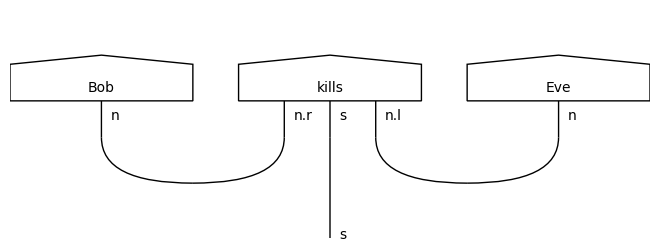

In [8]:
grammar.draw(train_diagrams[2])

In [9]:
from discopy.quantum import Ket, H, Rx, CX, sqrt

def verb_ansatz(phase):
    return Ket(0, 0) >> H @ sqrt(2) @ Rx(phase) >> CX

print(verb_ansatz(0).eval())

Tensor(dom=Dim(1), cod=Dim(2, 2), array=[0.99999994+0.j, 0.    +0.j, 0.    +0.j, 0.99999994+0.j])


In [10]:
from discopy import Diagram, Id, Cup
from discopy.grammar import draw

In [11]:
Alice, Bob, Eve = Word('Alice', n), Word('Bob', n), Word('Eve', n)
loves, hates, kills =  Word('loves', n.r @ s @ n.l),  Word('hates', n.r @ s @ n.l) , Word('kills', n.r @ s @ n.l)

In [28]:
grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)

parsing = {"{} {} {}".format(subj, verb, obj): subj @ verb @ obj >> grammar
            for subj in [Alice, Bob, Eve] for verb in [loves, hates, kills] for obj in [Alice, Bob, Eve]}

In [47]:
train_sentences

['Alice loves Bob', 'Alice hates Eve', 'Bob kills Eve']

In [52]:
parsing[train_sentences[0]]

Diagram(dom=Ty(), cod=Ty('s'), boxes=[Word('Alice', Ty('n')), Word('loves', Ty(Ob('n', z=1), 's', Ob('n', z=-1))), Word('Bob', Ty('n')), Cup(Ty('n'), Ty(Ob('n', z=1))), Cup(Ty(Ob('n', z=-1)), Ty('n'))], offsets=[0, 1, 4, 0, 1])

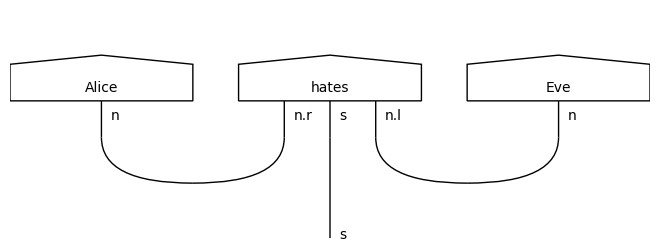

In [51]:
diagram = parsing[train_sentences[1]]
#print("Diagram for 'Alice loves Bob':")
draw(diagram, draw_type_labels=True)

Circuit for 'Alice loves Bob':


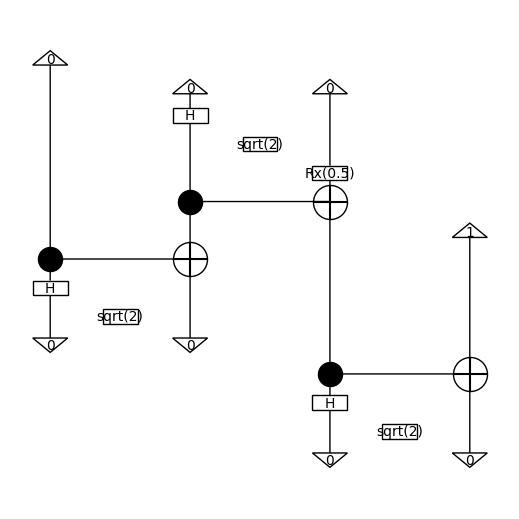

In [45]:
from discopy import CircuitFunctor, qubit

ob = {s: Ty(), n: 1}
ar = lambda params: {
    Alice: Ket(0), Bob: Ket(1),
    loves: verb_ansatz(params['loves']) }

F = lambda params: CircuitFunctor(ob, ar(params))

params0 = {'loves': 0.5}
#params1 = {'hates': 0.6}
#params2 = {'kills': 0.4}

print("Circuit for 'Alice loves Bob':")
F(params0)(parsing[train_sentences[0]]).draw(
    aspect='auto', draw_type_labels=False, figsize=(5, 5))
#F(params1)(parsing[train_sentences[1]]).draw(
 #   aspect='auto', draw_type_labels=False, figsize=(5, 5))
#F(params2)(parsing[train_sentences[2]]).draw(
  #  aspect='auto', draw_type_labels=False, figsize=(5, 5))

In [57]:
from discopy import CircuitFunctor, qubit

ob = {s: Ty(), n: qubit}
#ar = lambda params: {
 #   Alice: Ket(0), Bob: Ket(1), Eve: Ket(0),
  #  loves: verb_ansatz(params['loves']) }

ar = lambda params: {
    Alice: Ket(0), Bob: Ket(1), Eve: Ket(0),
    loves: verb_ansatz(params['loves']),
    hates: verb_ansatz(params['hates']), 
    kills: verb_ansatz(params['kills']) }

F = lambda params: CircuitFunctor(ob, ar(params))

params0 = {'loves': 0.5}
params1 = {'hates': 0.6}
params2 = {'kills': 0.4}

print("Circuit for 'Alice loves Bob':")
F(params0)(parsing[train_sentences[0]]).draw(
    aspect='auto', draw_type_labels=False, figsize=(5, 5))
#F(params1)(parsing[train_sentences[1]]).draw(
 #   aspect='auto', draw_type_labels=False, figsize=(5, 5))
#F(params2)(parsing[train_sentences[2]]).draw(
   # aspect='auto', draw_type_labels=False, figsize=(5, 5))

Circuit for 'Alice loves Bob':


KeyError: 'hates'

In [6]:
#******************************************
# Generate your circuits
#******************************************
# TODO: Implement your own functorial ansatz conversion!
# The `qnlp-tutorial` has some code on this.
# https://discopy.readthedocs.io/en/main/notebooks/qnlp-tutorial.html
# You may also find discopy's `IQPansatz` function useful.

# Suggestion: Draw some DisCoCat diagrams alongside their circuit diagrams
# and compare them

# TODO implement diagram2circuit
diagram2circuit = None

train_circuits = [diagram2circuit(d) for d in train_diagrams]
dev_circuits = [diagram2circuit(d) for d in dev_diagrams]
test_circuits = [diagram2circuit(d) for d in test_diagrams]

# You can define parameterised circuits in DisCoPy
# using sympy variables, then substituting them using `lambdify`
from discopy import drawing
from discopy.quantum import Id, Rz, CX, CRz
from sympy.abc import symbols, phi


sym = symbols("abc")
circ = Rz(sym) @ Id(1) >> CX >> CRz(phi)
drawing.equation(circ, circ.lambdify(sym, phi)(0.1, 0.2), symbol='-->')

TypeError: 'NoneType' object is not callable